In [5]:
# get data with pandas.read_csv
import pandas as pd
import numpy as np
import pycaret
from pandas_profiling import ProfileReport
dataset = pd.read_csv('loans.csv')

dataset.shape

profile = ProfileReport(dataset, title="Loans profile report", explorative=True)
profile.to_notebook_iframe()

# clean up data
#dataset.drop('Fictional Surname', axis=1, inplace=True)
#dataset.drop('Customer ID', axis=1, inplace=True)
#dataset.drop('Country', axis=1, inplace=True)
#dataset.drop('Gender', axis=1, inplace=True)
#dataset.drop('Age', axis=1, inplace=True)
#dataset.drop('Postcode', axis=1, inplace=True)

# instead of the above, might be better to use the following method after splitting test data:
#setup(data, ignore_features = ['Column Name', '...'])


# split to data and unseen data 
data = dataset.sample(frac=0.85, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for modeling: ' + str(data.shape))
print('Unseen data for Predictions: ' + str(data_unseen.shape))


Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data for modeling: (1700, 14)
Unseen data for Predictions: (300, 14)


In [2]:
from pycaret.classification import *

#exp_clf101 = setup(data = data, target='Outcome', session_id=123)
exp = setup(data = data, target='Outcome', session_id=123, ignore_features = ['Fictional Surname', 'Customer ID', 'Country', 'Gender', 'Age', 'Postcode'])

In [3]:
# Compare performance of classifiers
best_model = compare_models(fold = 5)

In [4]:
# Create a random forest classifier model
rf = create_model('rf')

In [5]:
# create a LR model
lr = create_model('lr')

In [6]:
# tune the LR
tuned_lr = tune_model(lr)

In [28]:
# create a knn classifier model.
knn = create_model('knn')

In [29]:
tuned_knn = tune_model(knn)

In [6]:
tuned_rf = tune_model(rf)

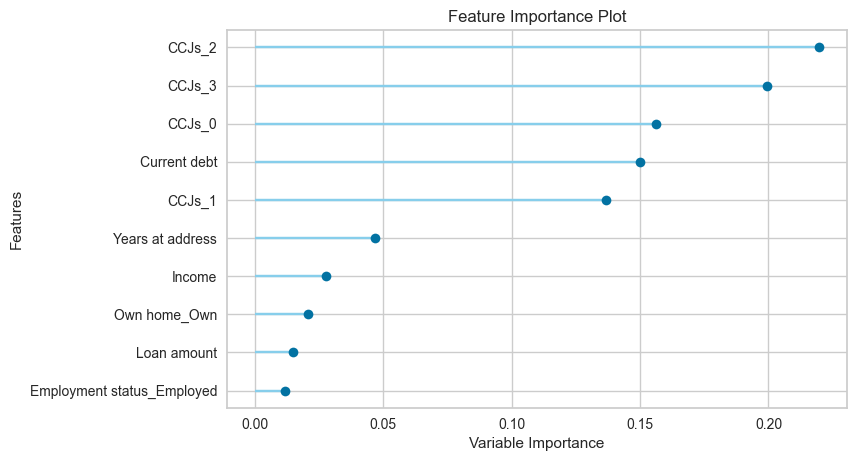

In [20]:
#evaluation
plot_model(tuned_rf, plot = 'confusion_matrix')
plot_model(tuned_rf, plot = 'feature')

In [12]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
predict_model(tuned_rf)

Years at address  Current debt   Income  Loan amount  \
0                35.0        8240.0  19500.0       9654.0   
1                 2.0           0.0  49500.0      39437.0   
2                 8.0           0.0  46000.0       3549.0   
3                50.0         820.0  26500.0       4238.0   
4                34.0         780.0  40000.0      20918.0   
..                ...           ...      ...          ...   
506              45.0         240.0  29500.0       9026.0   
507              13.0        2400.0  41500.0      15147.0   
508              52.0        9900.0  25500.0      10864.0   
509              23.0        3760.0  46500.0      44903.0   
510              27.0        7670.0  36000.0      21073.0   

     Employment status_Employed  Employment status_Retired  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           1.0                        0.0   
4                           1.0                        0.0   
..                          ...                        ...   
506                         1.0                        0.0   
507                         0.0                        0.0   
508                         0.0                        0.0   
509                         1.0                        0.0   
510                         0.0                        0.0   

     Employment status_Self Employed  Employment status_Unemployed  \
0                                0.0                           1.0   
1                                0.0                           1.0   
2                                0.0                           1.0   
3                                0.0                           0.0   
4                                0.0                           0.0   
..                               ...                           ...   
506                              0.0                           0.0   
507                              1.0                           0.0   
508                              0.0                           1.0   
509                              0.0                           0.0   
510                              0.0                           1.0   

     Own home_Mortgage  Own home_Own  Own home_Rent  CCJs_0  CCJs_1  CCJs_10  \
0                  0.0           1.0            0.0     1.0     0.0      0.0   
1                  0.0           1.0            0.0     1.0     0.0      0.0   
2                  0.0           1.0            0.0     0.0     1.0      0.0   
3                  1.0           0.0            0.0     1.0     0.0      0.0   
4                  0.0           0.0            1.0     0.0     1.0      0.0   
..                 ...           ...            ...     ...     ...      ...   
506                0.0           1.0            0.0     0.0     1.0      0.0   
507                0.0           1.0            0.0     0.0     1.0      0.0   
508                1.0           0.0            0.0     0.0     0.0      0.0   
509                0.0           0.0            1.0     1.0     0.0      0.0   
510                0.0           1.0            0.0     0.0     0.0      0.0   

     CCJs_100  CCJs_2  CCJs_3    Outcome      Label   Score  
0         0.0     0.0     0.0  Defaulted  Defaulted  0.6291  
1         0.0     0.0     0.0       Paid       Paid  0.6406  
2         0.0     0.0     0.0       Paid       Paid  0.6997  
3         0.0     0.0     0.0       Paid       Paid  0.6645  
4         0.0     0.0     0.0       Paid       Paid  0.7036  
..        ...     ...     ...        ...        ...     ...  
506       0.0     0.0     0.0       Paid       Paid  0.6811  
507       0.0     0.0     0.0       Paid       Paid  0.7026  
508       0.0     0.0     1.0  Defaulted  Defaulted  0.8260  
509       0.0     0.0     0.0       Paid       Paid  0.7019  
510       0.0     0.0     1.0  Defaulted  D

In [22]:
final_rf = finalize_model(tuned_rf)
predict_model(final_rf)

Years at address  Current debt   Income  Loan amount  \
0                35.0        8240.0  19500.0       9654.0   
1                 2.0           0.0  49500.0      39437.0   
2                 8.0           0.0  46000.0       3549.0   
3                50.0         820.0  26500.0       4238.0   
4                34.0         780.0  40000.0      20918.0   
..                ...           ...      ...          ...   
506              45.0         240.0  29500.0       9026.0   
507              13.0        2400.0  41500.0      15147.0   
508              52.0        9900.0  25500.0      10864.0   
509              23.0        3760.0  46500.0      44903.0   
510              27.0        7670.0  36000.0      21073.0   

     Employment status_Employed  Employment status_Retired  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           1.0                        0.0   
4                           1.0                        0.0   
..                          ...                        ...   
506                         1.0                        0.0   
507                         0.0                        0.0   
508                         0.0                        0.0   
509                         1.0                        0.0   
510                         0.0                        0.0   

     Employment status_Self Employed  Employment status_Unemployed  \
0                                0.0                           1.0   
1                                0.0                           1.0   
2                                0.0                           1.0   
3                                0.0                           0.0   
4                                0.0                           0.0   
..                               ...                           ...   
506                              0.0                           0.0   
507                              1.0                           0.0   
508                              0.0                           1.0   
509                              0.0                           0.0   
510                              0.0                           1.0   

     Own home_Mortgage  Own home_Own  Own home_Rent  CCJs_0  CCJs_1  CCJs_10  \
0                  0.0           1.0            0.0     1.0     0.0      0.0   
1                  0.0           1.0            0.0     1.0     0.0      0.0   
2                  0.0           1.0            0.0     0.0     1.0      0.0   
3                  1.0           0.0            0.0     1.0     0.0      0.0   
4                  0.0           0.0            1.0     0.0     1.0      0.0   
..                 ...           ...            ...     ...     ...      ...   
506                0.0           1.0            0.0     0.0     1.0      0.0   
507                0.0           1.0            0.0     0.0     1.0      0.0   
508                1.0           0.0            0.0     0.0     0.0      0.0   
509                0.0           0.0            1.0     1.0     0.0      0.0   
510                0.0           1.0            0.0     0.0     0.0      0.0   

     CCJs_100  CCJs_2  CCJs_3    Outcome      Label   Score  
0         0.0     0.0     0.0  Defaulted  Defaulted  0.6115  
1         0.0     0.0     0.0       Paid       Paid  0.7013  
2         0.0     0.0     0.0       Paid       Paid  0.6907  
3         0.0     0.0     0.0       Paid       Paid  0.6487  
4         0.0     0.0     0.0       Paid       Paid  0.7037  
..        ...     ...     ...        ...        ...     ...  
506       0.0     0.0     0.0       Paid       Paid  0.7017  
507       0.0     0.0     0.0       Paid       Paid  0.6884  
508       0.0     0.0     1.0  Defaulted  Defaulted  0.8292  
509       0.0     0.0     0.0       Paid       Paid  0.6985  
510       0.0     0.0     1.0  Defaulted  D

In [23]:
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [7]:
# finalise the LR model
final_lr = finalize_model(tuned_lr)
# print it
print(final_lr)

LogisticRegression(C=0.472, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
